In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from time import process_time
import numpy as np
import matplotlib.pyplot as plt

Initialization of weights and locations.

In [ ]:
P = 20 #number of points
points = np.random.rand(P, 2)   # P random points in 2-D
#points = np.array([[20.,0.],[59.,0],[-20.,-48.],[-20.,48.]])
#points = np.array([[0.,-1.],[0.,1.],[-1.,0.],[1.,0.]])         #Test example task 4
#P=len(points)
hull = ConvexHull(points)

#Definition of the weights
#weights = np.random.rand(P)
weights = np.ones(P)
#weights = np.array([5.,5.,13.,13.])

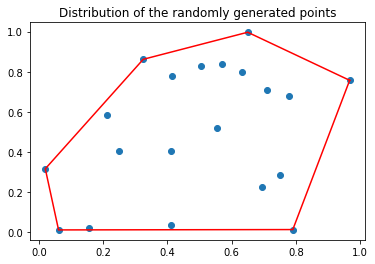

In [ ]:
plt.plot(points[:,0], points[:,1], 'o')
vv = np.append(hull.vertices,hull.vertices[0])
plt.plot(points[vv,0],points[vv,1],'r-')
plt.title("Distribution of the randomly generated points")
plt.show()

Definition of all the funcions called in the main code.

In [ ]:
vv = hull.vertices
#Function to compute the sigma(x) for the stopping criterion
def distanceHull(p):
  m = 0
  for i in vv:
    if np.linalg.norm(p-points[i,:],2)>m:
      m = np.linalg.norm(p-points[i,:])
  return m

In [ ]:
#Function for the iteration

#This function computes the weights w_i / d2(ai,p)
def scaledWeights(p):
  scaled = np.zeros(P)
  for i in range(P):
    scaled[i]=weights[i]/np.linalg.norm(points[i,:]-p)
  return scaled

def scaledWeightsNotK(p,k):
  scaled = np.zeros(P)
  for i in range(P):
    if i!=k:
      scaled[i]=weights[i]/np.linalg.norm(points[i,:]-p)

  return scaled #the kth component will not be used and it is simply set to 0

#Function for the fixed point iteration
def T(p):
  res = 0
  scaled = scaledWeights(p)
  for i in range(P):
    res += scaled[i]*points[i,:]
  return res/sum(scaled)

#Objective function
def F(p):
  res = 0
  for i in range(P):
    res += weights[i] * np.linalg.norm(p-points[i,:])
  return res

#Gradient of the objective function
def gradF(p):
  res = np.array([0.,0.])
  scaled = scaledWeights(p)
  for i in range(P):
    res+=scaled[i]*(p-points[i,:])
  return res

Checking of optimality in the set of locations $A_q$

In [ ]:
#Check for optimality of the location points[k,:]
def checkOptimality(k):
  dist1 = 0
  dist2 = 0
  scaled = scaledWeightsNotK(points[k,:],k)
  for i in range(P):
    if i!=k:
      dist1+= scaled[i]*(points[k,0]-points[i,0])
      dist2+= scaled[i]*(points[k,1]-points[i,1])
  res = np.sqrt(dist1**2+dist2**2)
  return res<=weights[k]

Weiszfeld Algorithm

In [ ]:
#Weiszfeld algorithm
cc = False #true if the solution is on a location

#Check if the minimizer is in the set of given locations
for i in range(P):
  if checkOptimality(i) and not cc:
    cc = True
    sol = points[i,:]

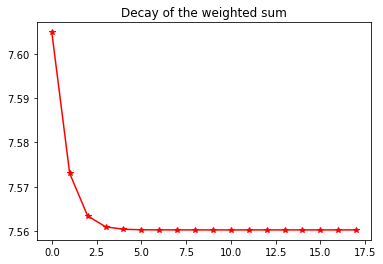

Computation time: 0.01651766900000018
18
[0.51944701 0.54396676]


In [ ]:
#Weiszfeld Iterations
tol = 1e-6
valueOfF = []
sol_w_it=[]

residuiW = []

if not cc:
  res = tol+1
  it = 1
  maxit = 1000
  #sol = np.array([44.,0.])
  sol = np.array([0.,0.])
  for i in range(P):
    sol += weights[i]*points[i,:]
  sol = sol/sum(weights) #initialization as gravitational center
  sol_w_it.append(sol)
  valueOfF.append(F(sol))
  t_1 = process_time()
  while res > tol and it<maxit:
    sol = T(sol) #fixed point iteration
    #sol_w_it.append(sol)
    #print(sol)

    test = False
    for PP in points:
      if np.linalg.norm(sol - PP)==0 and not test:
        test = True
    
    if not test:
      sol_w_it.append(sol)
      sigma = distanceHull(sol)
      grad = np.linalg.norm(gradF(sol),2)
      valueOfF.append(F(sol))
      w = F(sol)

      res = sigma*grad/(w-sigma*grad)
      residuiW.append(res)
      #res=grad

      it += 1
    else:
      it = 1
      sol = np.random.rand(2)
      residuiW = []
      sol_it = [sol]

  t_2 = process_time()
  plt.plot(np.arange(it),valueOfF,'r-*')
  plt.title("Decay of the weighted sum")
  plt.show() 

  print("Computation time:", t_2-t_1)
  print(it)
  print(sol)

sol_w=sol

Gradient discent with backtracking

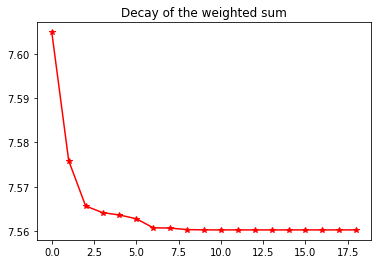

Computation time: 0.19184040800000002
19
[0.51944687 0.54396686]


In [ ]:
#Backtracking
def a(sol):
  a_0 = 0.8
  rho = 0.7
  c_1 = 0.02
  while F(sol-a_0*gradF(sol))>F(sol)-c_1*a_0*np.linalg.norm(gradF(sol),2)**2:
    a_0=rho*a_0
    #print(a_0)

  return a_0

residuiGD = []

#Implementation of Gradient Descent
tol = 1e-6
valueOfF = []
sol_it=[]
if not cc:
  res = tol+1
  it = 1
  maxit = 1000
  #sol = np.array([44.,0.])
  sol = np.array([0.,0.])
  for i in range(P):
    sol += weights[i]*points[i,:]
  sol = sol/sum(weights) #initialization as gravitational center
  sol_it.append(sol)
  valueOfF.append(F(sol))
  t_1 = process_time()
  while res > tol and it<maxit:
    sol =  sol - a(sol)*gradF(sol)
    sol_it.append(sol)

    sigma = distanceHull(sol)
    grad = np.linalg.norm(gradF(sol),2)
    valueOfF.append(F(sol))
    w = F(sol)

    res = sigma*grad/(w-sigma*grad)
    residuiGD.append(res)
    #res=grad

    it += 1

  t_2 = process_time()
  plt.plot(np.arange(it),valueOfF,'r-*')
  plt.title("Decay of the weighted sum")
  plt.show() 

  print("Computation time:", t_2-t_1)
  print(it)
  print(sol)

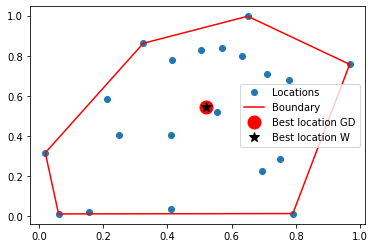

In [ ]:
plt.plot(points[:,0], points[:,1], 'o',label='Locations')
vv = np.append(hull.vertices,hull.vertices[0])
plt.plot(points[vv,0],points[vv,1],'r-',label='Boundary')
plt.plot(sol[0],sol[1],'ro',markersize=13,label='Best location GD')
plt.plot(sol_w[0],sol_w[1],'k*',markersize=10,label='Best location W')
sol_it=np.array(sol_it)
sol_w_it=np.array(sol_w_it)

plt.legend()
plt.show()